In [ ]:
# Run in terminal or command prompt
# ! python -m spacy download en ## spacy.load('en_core_web_sm')

In [1]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
import joblib  

from spacy.lang.en.stop_words import STOP_WORDS as en_stop
import en_core_web_sm

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import GridSearchCV

from pprint import pprint
from bokeh.models import Label
from bokeh.plotting import figure, show

from sklearn.manifold import TSNE

# Plotting tools
import matplotlib.pyplot as plt

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Data cleaned

In [2]:
def clean_txt(txt: str) -> str:
    txt = re.sub(r'[^\w]', ' ', txt)
    return txt

In [3]:
def remove_digit(txt: str) -> str:
    result = ''.join([i for i in txt if not i.isdigit()])
    return result

In [4]:
list_stopWords = list(en_stop)

def remove_stop_words(txt: str):
    
    string_txt = " " 
    list_words = []
    
    sentence = txt.split()

    for val in sentence:
        if val not in list_stopWords:
            list_words.append(val)

    return string_txt.join(list_words)

In [5]:
lemmatizer = WordNetLemmatizer()
 
def nltk2wn_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

def lemmatization(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:                        
          res_words.append(word)
        else:
          res_words.append(lemmatizer.lemmatize(word, tag))
      
    return " ".join(res_words)

In [6]:
# English stop words
list_stopWords = ['year', 'time', 'know', 'come', 'use', 'tell', 'want', 'day', 'say', 'says', 'ha', 'wa', 'like', 'think', 'make', 'new', 'song', 'time', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'A', 'a', 'B', 'b', 'C', 'c', 'D', 'd', 'E', 'e', 'F', 'f', 'G', 'g', 'H', 'h', 'I', 'i', 'J', 'j', 'K', 'k', 'L', 'l', 'M', 'm', 'N', 'n', 'O', 'o', 'P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', 'T', 't', 'U', 'u', 'V', 'v', 'W', 'w', 'X', 'x', 'Y', 'y', 'Z', 'z']

In [7]:
def stop_words(txt: str):
    
    string_txt = " " 
    list_words = []
    
    sentence = txt.split()

    for val in sentence:
        if val not in list_stopWords:
            list_words.append(val)

    return string_txt.join(list_words)

### Read data

In [2]:
data_cleaned = pd.read_csv('../Topic modeling/data_npr_cleaning.csv', parse_dates=[0], infer_datetime_format=True)

In [3]:
data_cleaned.loc[14, 'Article']

'Being overweight raise blood pressure cholesterol risk develop diabetes It bad brain A diet high saturated fat sugar Western diet actually affect brain important memory people likely crave unhealthful food psychologist Terry Davidson director Center Behavioral Neuroscience American University Washington D C He didn t start study people eat Instead interested learn hippocampus brain s heavily involve memory He try figure hippocampus He study rat specific type hippocampal damage happen In process Davidson notice strange The rat hippocampal damage pick food rat eat little bit drop Davidson realize rat didn t know He similar happen human brain people eat diet high fat sugar Davidson s vicious cycle bad diet brain change He point study Journal Pediatrics find obese child perform poorly memory task test hippocampus compare kid weren t overweight He brain system impair kind diet difficult stop eating diet I think evidence fairly substantial effect diet obesity brain function cognitive functi

In [9]:
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.str.contains('^Unnamed')]

In [10]:
data_cleaned['Article'] = data_cleaned['Article'].apply(lambda x: stop_words(x))   

In [11]:
data_cleaned.head()

,Article
0,In Washington policy bipartisan politics And s...
1,Donald Trump Twitter preferred mean communicat...
2,Donald Trump unabashedly praising Russian Pres...
3,Updated ET Russian President Vladimir Putin Ru...
4,From photography illustration video data visua...


In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  11992 non-null  object
dtypes: object(1)
memory usage: 93.8+ KB


### Create the Document-Word matrix

In [12]:
vectorizer = CountVectorizer(analyzer='word', min_df=10, stop_words='english',             
                             lowercase=True, token_pattern='[a-zA-Z0-9]{3,}',
                             max_features=50000,)

data_vectorized = vectorizer.fit_transform(data_cleaned['Article'])

### Build LDA model with sklearn

In [13]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10, max_iter=10, 
                                      learning_method='online', random_state=100,
                                      batch_size=128, evaluate_every = -1,
                                      n_jobs = -1,)

lda_output = lda_model.fit_transform(data_vectorized)

In [17]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
 evaluate_every=-1, learning_decay=0.7,
 learning_method='online', learning_offset=10.0,
 max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
 n_components=10, n_jobs=-1, perp_tol=0.1,
 random_state=100, topic_word_prior=None,
 total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)

### Diagnose model performance with perplexity and log-likelihood

In [18]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -30675969.612783805
Perplexity:  3097.8000839116776
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
from datetime import datetime

### Use GridSearch to determine the best LDA model

In [ ]:
start_time = datetime.now()

# Define Search Param
search_params = {'n_components': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26,
                                  28, 30], 
                 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', 
                                learning_offset=50.,random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score='raise',
    estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
          evaluate_every=-1, learning_decay=0.7, learning_method=None,
          learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
          mean_change_tol=0.001, n_components=10, n_jobs=1, perp_tol=0.1, 
          random_state=None,
          topic_word_prior=None, total_samples=1000000.0, verbose=0), n_jobs=1,
    param_grid={'n_topics': [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26,
                                  28, 30], 
                'learning_decay': [0.5, 0.7, 0.9]},
    pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', 
    scoring=None, verbose=0)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
# joblib.dump(model, '../Topic modeling/best_model_lda_BOW_GSCV.pkl') 

In [14]:
BOW_model = joblib.load("../Topic modeling/best_model_lda_BOW_GSCV.pkl")  

In [15]:
# Best Model
best_lda_model = BOW_model.best_estimator_

In [16]:
# Model Parameters
print("Best Model's Params: ", BOW_model.best_params_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}


In [23]:
# Log Likelihood Score
print("Best Log Likelihood Score: ", BOW_model.best_score_)

Best Log Likelihood Score:  -6342709.322640083


In [24]:
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Model Perplexity:  3113.7697882766774


In [26]:
# BOW_model.cv_results_

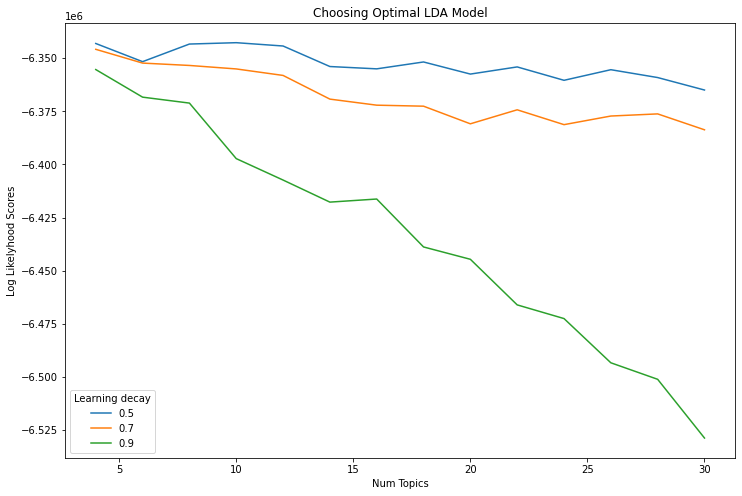

In [27]:
# Get Log Likelyhoods from Grid Search Output
nub_topics = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
mean = 'mean_test_score'
log_likelyhoods_5 = [round(BOW_model.cv_results_[mean][i]) for i, gscore in enumerate(BOW_model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(BOW_model.cv_results_[mean][i]) for i, gscore in enumerate(BOW_model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(BOW_model.cv_results_[mean][i]) for i, gscore in enumerate(BOW_model.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(nub_topics, log_likelyhoods_5, label='0.5')
plt.plot(nub_topics, log_likelyhoods_7, label='0.7')
plt.plot(nub_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [17]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

In [18]:
lda_output_GSCV = best_lda_model.transform(data_vectorized)

In [19]:
lda_keys = get_keys(lda_output_GSCV)

In [20]:
n__topics = 10

In [21]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n__topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [33]:
top_n_words_lda = get_top_n_words(10, lda_keys, data_vectorized, vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  trump president clinton campaign house people white report russia obama
Topic 2:  people police report attack city kill officer force group state
Topic 3:  music people play album work world way win record band
Topic 4:  people health care percent tax trump company state pay plan
Topic 5:  trump clinton state vote win voter party campaign sanders candidate
Topic 6:  people way thing work woman life story look write book
Topic 7:  food water people work eat way look world state big
Topic 8:  state school court law student case federal report people trump
Topic 9:  people health study patient disease drug woman work doctor percent
Topic 10:  country trump people president china north government report world korea


In [ ]:
# dict_topics = {'Topic 1': 'USA politic', 'Topic 2':'security', 'Topic 3': 'entraitement', 'Topic 4': 'health care', 
#                'Topic 5': 'elections', 'Topic 6': 'women rights', 'Topic 7': 'wellbeing', 'Topic 8': 'education',
#               'Topic 9': 'social security', 'Topic 10': 'World politics'}

In [ ]:
# import re

# s = "[[0.  0.3 0.7 0.  0.  0.  0.  0.  0.  0. ]]"

# def add_comma(match):
#     return match.group(0) + ','

# s = re.sub(r'\[[0-9\.\s]+\]', add_comma, s)
# s = re.sub(r'([0-9\.]+)', add_comma, s)
# mylist = eval(s)

In [34]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_output_GSCV)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 11992 samples in 0.027s...
[t-SNE] Computed neighbors for 11992 samples in 1.598s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11992
[t-SNE] Computed conditional probabilities for sample 2000 / 11992
[t-SNE] Computed conditional probabilities for sample 3000 / 11992
[t-SNE] Computed conditional probabilities for sample 4000 / 11992
[t-SNE] Computed conditional probabilities for sample 5000 / 11992
[t-SNE] Computed conditional probabilities for sample 6000 / 11992
[t-SNE] Computed conditional probabilities for sample 7000 / 11992
[t-SNE] Computed conditional probabilities for sample 8000 / 11992
[t-SNE] Computed conditional probabilities for sample 9000 / 11992
[t-SNE] Computed conditional probabilities for sample 10000 / 11992
[t-SNE] Computed conditional probabilities for sample 11000 / 11992
[t-SNE] Computed conditional probabilities for sample 11992 / 11992
[t-SNE] Mean sigma: 0.071187
[t-SNE] KL divergenc

In [22]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n__topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [23]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",])
colormap = colormap[:n__topics]

In [ ]:
# !pip install bokeh

In [25]:
top_3_words_lda = get_top_n_words(3, lda_keys, data_vectorized, vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of LDA Topics".format(20), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0].tolist(), y=tsne_lda_vectors[:,1].tolist(), color=colormap[lda_keys])

for t in range(10):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot) 

### Dominant topic

In [26]:
# Create Document — Topic Matrix
lda_output_GS = best_lda_model.transform(data_vectorized)
# column names
topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(data_cleaned))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_GS, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'red' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.670000,0.040000,0.000000,0.020000,0.100000,0.060000,0.000000,0.000000,0.000000,0.100000,0
Doc1,0.480000,0.060000,0.000000,0.000000,0.040000,0.030000,0.000000,0.000000,0.000000,0.380000,0
Doc2,0.750000,0.020000,0.000000,0.000000,0.090000,0.040000,0.000000,0.000000,0.000000,0.100000,0
Doc3,0.790000,0.000000,0.030000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.160000,0
Doc4,0.060000,0.110000,0.190000,0.110000,0.030000,0.120000,0.080000,0.120000,0.030000,0.140000,2
Doc5,0.020000,0.000000,0.090000,0.000000,0.000000,0.330000,0.070000,0.040000,0.450000,0.000000,8
Doc6,0.030000,0.010000,0.090000,0.000000,0.020000,0.100000,0.030000,0.000000,0.700000,0.020000,8
Doc7,0.000000,0.000000,0.030000,0.060000,0.010000,0.480000,0.160000,0.000000,0.010000,0.250000,5
Doc8,0.050000,0.030000,0.000000,0.000000,0.000000,0.370000,0.120000,0.020000,0.370000,0.040000,5
Doc9,0.020000,0.010000,0.280000,0.010000,0.000000,0.310000,0.360000,0.000000,0.000000,0.000000,6


In [32]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head() 

,aaa,aap,aaron,aarp,aarti,aback,abandon,abandoned,abandonment,abbas,...,zinke,zip,zoe,zombie,zone,zoo,zoom,zucchini,zucker,zuckerberg
Topic0,0.100011,0.100011,0.100044,0.100004,0.100137,0.100021,2.058065,0.100020,0.100174,0.100034,...,0.100004,0.100037,0.100001,0.100031,0.100028,0.100004,0.100008,0.100002,25.515694,0.100083
Topic1,18.725984,0.100003,0.100032,0.100004,0.100042,0.100048,43.278902,0.100200,0.100034,59.359370,...,0.100001,0.100072,0.100010,0.100045,166.636968,0.100009,0.100025,0.100003,0.100005,0.100048
Topic2,0.100014,0.100006,39.564724,0.100012,0.100013,20.330915,3.679522,3.149781,13.552318,0.100007,...,0.100001,0.100034,0.100017,0.100031,12.043164,0.100013,18.277126,0.100006,0.100033,0.100014
Topic3,0.100261,0.100027,0.100170,7.825536,0.100047,0.100045,11.752389,0.100409,0.100134,0.100006,...,0.100005,19.689154,0.100007,0.100023,0.100027,0.100021,0.100043,0.100002,0.100037,0.100174
Topic4,0.100012,0.100001,0.100031,0.100012,0.100009,0.100030,27.504479,0.100107,0.100324,0.100020,...,0.100011,0.100017,0.100002,0.100050,0.100019,0.100001,0.100009,0.100001,0.100032,0.100058


Get the top 15 keywords each topic

In [44]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,trump,president,clinton,campaign,obama,news,donald,house,white,email,russia,election,report,statement,national
Topic 1,police,people,report,city,attack,kill,officer,force,family,group,war,military,gun,npr,death
Topic 2,music,play,new,record,album,team,win,film,world,game,love,artist,band,include,sound
Topic 3,people,company,percent,pay,health,million,care,job,work,money,tax,plan,cost,business,program
Topic 4,trump,clinton,vote,state,election,voter,win,campaign,republican,candidate,party,republicans,democratic,democrats,poll
Topic 5,people,thing,way,woman,work,life,story,look,good,lot,feel,book,kind,family,talk
Topic 6,food,water,eat,animal,plant,restaurant,small,grow,farm,cook,land,place,area,home,farmer
Topic 7,school,state,law,student,court,case,federal,public,report,right,justice,department,rule,education,judge
Topic 8,study,health,people,patient,disease,drug,medical,research,test,doctor,hospital,researcher,brain,child,university
Topic 9,country,china,world,government,united,international,refugee,north,south,american,states,war,president,chinese,foreign


### Predict Topics using LDA model

In [80]:
nlp = spacy.blank("en")

def predict_topic(text, nlp=nlp):

    # Step 1: Clean with simple_preprocess
    mytext_1 = clean_txt(text[0])
    
    # Step 2: Remove digit
    mytext_2 = remove_digit(mytext_1)
    
    # Step 3: Remove specific words
    mytext_3 = stop_words(mytext_2)
    
    # Step 4: Remove stop words
    mytext_4 = remove_stop_words(mytext_3)
    
    # Step 5: Lemmatize
    mytext_5 = lemmatization(mytext_4)
    
    # Step 6: Vectorize transform
    mytext_6 = vectorizer.transform([mytext_5])
    
    # Step 7: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_6)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    return topic, topic_probability_scores

In [81]:
# Predict the topic
mytext = ["Former President Donald Trump expressed admiration for Barack Obama at an event on Saturday night, after years of criticizing and insulting him.Trump made the comments to Bill O'Reilly on the first night of their four-date History Tour in Sunrise, Florida."]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['president', 'clinton', 'campaign', 'obama', 'news', 'donald', 'house', 'white', 'email', 'russia', 'election', 'report', 'statement']


In [82]:
def apply_predict_topic(text):
    text = [text]
    topic, prob_scores = predict_topic(text = text)
    return(infer_topic)

In [95]:
nlp = spacy.blank("en")

def similar_documents(text, doc_topic_probs, documents = data_cleaned, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
#         print("Topic KeyWords: ", topic)
#         print("Topic Prob Scores of text: ", np.round(x, 3))
#         print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
        return topic, np.round(doc_topic_probs[doc_ids], 1)

In [97]:
mytext = ["Former President Donald Trump expressed admiration for Barack Obama at an event on Saturday night, after years of criticizing and insulting him.Trump made the comments to Bill O'Reilly on the first night of their four-date History Tour in Sunrise, Florida."]
# mytext = ["Team BS est un groupe de hip-hop et de pop français, originaire de la banlieue parisienne, se composant de La Fouine, Sultan, Fababy et Sindy."]
topic, score = similar_documents(text=mytext, doc_topic_probs=lda_output_GS, documents = data_cleaned['Article'].tolist(), top_n=1, verbose=True)

In [98]:
print('Topic :', topic)
print()
print('Score :', score)

Topic : ['president', 'clinton', 'campaign', 'obama', 'news', 'donald', 'house', 'white', 'email', 'russia', 'election', 'report', 'statement']

Score : [[0.7 0.  0.1 0.  0.1 0.1 0.  0.  0.  0. ]]


https://yanlinc.medium.com/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/#5tokenizeandcleanupusinggensimssimple_preprocess